In [ ]:
# Import necessary libraries
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

In [ ]:
# Preprocess text data
# Delete all the stopwords in a sentence
def preprocess_text(text):
    return [token for token in simple_preprocess(text) if token not in gensim.parsing.preprocessing.STOPWORDS]

In [ ]:
import pandas as pd
df = pd.read_csv("all-data.csv", names=["sentiment", "text"], encoding="utf-8", encoding_errors="replace")
headlines = df.iloc[:, 1]
print(len(headlines))

4846


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from multiprocessing import process
# Load data
processed_data= [preprocess_text(text) for text in headlines]
df['processed_text'] = processed_data

pd.set_option('display.max_colwidth', None)
print(headlines[:1])
print(df['processed_text'][:1])

0    According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
Name: text, dtype: object
0    [according, gran, company, plans, production, russia, company, growing]
Name: processed_text, dtype: object


In [ ]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_data)
print(len(list(dictionary.items())))
corpus = [dictionary.doc2bow(text) for text in processed_data]
print(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8747
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(4, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(1, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(1, 1), (5, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(0, 1), (1, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(52, 2), (60, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(23, 1), (55, 1), (57, 1), (59, 1), (78, 1), (79, 1), (80, 3), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 2), (87, 1), (88, 1)], [(55, 1), (56, 1), (57, 1), (59, 1), (80, 2), (85, 1), (89, 1), (90, 2)], [(55, 1), (56

In [ ]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=11, # best performance
                     random_state=42,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

In [ ]:
pip install pyldavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.1 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.029126  0.328942       1        1  17.303914
0     -0.031547 -0.047905       2        1  13.586372
9      0.433169 -0.080359       3        1  12.868775
6     -0.001354  0.213465       4        1  11.344617
7     -0.032384 -0.078252       5        1  10.589849
5     -0.039129 -0.078813       6        1   8.680367
2     -0.070183 -0.053977       7        1   5.782011
8     -0.070186 -0.052674       8        1   5.679126
1     -0.070027 -0.051092       9        1   4.842386
3     -0.074201 -0.049466      10        1   4.708225
4     -0.073282 -0.049869      11        1   4.614358, topic_info=               Term         Freq        Total Category  logprob  loglift
80              eur  1346.000000  1346.000000  Default  30.0000  30.0000
1           company   986.000000   986.000000  Default  29.0000  29.0000
90               mn   747.000000   747.000000  Default  28.0000  28.0000
146         finnish   604.000000   604.000000  Default  27.0000  27.0000
365             mln   334.000000   334.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
163             afx    22.959687    23.889999  Topic11  -4.7209   3.0363
2572  restructuring    22.943670    23.873954  Topic11  -4.7216   3.0363
676        customer    22.290690    23.220982  Topic11  -4.7505   3.0351
533           issue    21.777046    22.707330  Topic11  -4.7738   3.0342
7101         longer    20.770483    21.701000  Topic11  -4.8211   3.0322

[367 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
503       2  0.988577         ac
0         1  0.992403  according
1299      9  0.986900      added
2003      9  0.954337  afternoon
163      11  0.962746        afx
...     ...       ...        ...
2108      5  0.985432       wood
381       2  0.979839      world
87        3  0.997967       year
64        4  0.966836      years
746      11  0.977002        yit

[340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 1, 10, 7, 8, 6, 3, 9, 2, 4, 5])

In [ ]:
# Assume lda_model is your trained LDA model, and dictionary is the Gensim dictionary.

# Get the number of topics in the model
num_topics = lda_model.num_topics

# Loop through each topic and get the top 15 words
top_words_per_topic = {}
for topic_id in range(num_topics):
    # Get the top 15 words for each topic (word, probability)
    top_words = lda_model.show_topic(topic_id, 15)

    # Store the words (not probabilities) in the dictionary
    top_words_per_topic[topic_id] = [word for word, prob in top_words]

# Print the top words for each topic
for topic_id, words in top_words_per_topic.items():
    print(f"Topic {topic_id+1}: {', '.join(words)}")


Topic 1: helsinki, new, omx, nokia, contract, services, expected, technology, index, service, customers, people, information, terms, set
Topic 2: mln, euro, number, value, stora, euros, enso, units, added, power, fall, use, includes, posted, annual
Topic 3: bank, board, months, building, march, eps, trade, real, cash, ceo, august, finnair, line, offer, november
Topic 4: financial, production, plant, performance, projects, approximately, high, waste, demand, life, sq, continue, volume, segment, center
Topic 5: result, items, costs, fourth, earnings, personnel, report, rights, decrease, growth, voting, cutting, transaction, measures, closed
Topic 6: share, shares, business, pct, lower, half, end, prices, paper, development, turnover, june, printing, price, previously
Topic 7: finnish, said, oyj, operations, today, second, capital, hel, group, stock, corporation, maker, estimated, negotiations, helsinki
Topic 8: decreased, fell, management, media, news, unit, cent, industry, solutions, up

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num_topics = 11
num_words = 15

# Iterate through each topic
for topic_id in range(num_topics):
    # Get the top words for the current topic
    top_words = lda_model.get_topic_terms(topic_id, topn=num_words)

    # Extract the word IDs and their probabilities
    words_with_probabilities = [(dictionary[word_id], prob) for word_id, prob in top_words]

    # Print the topic ID and the top words with their probabilities
    print(f"Topic {topic_id}:")
    for word, prob in words_with_probabilities:
        print(f"  {word}: {prob:.4f}")
    print()

Topic 0:
  helsinki: 0.0309
  new: 0.0308
  omx: 0.0240
  nokia: 0.0219
  contract: 0.0212
  services: 0.0209
  expected: 0.0144
  technology: 0.0126
  index: 0.0120
  service: 0.0113
  customers: 0.0112
  people: 0.0112
  information: 0.0111
  terms: 0.0111
  set: 0.0107

Topic 1:
  mln: 0.1232
  euro: 0.0789
  number: 0.0378
  value: 0.0309
  stora: 0.0251
  euros: 0.0247
  enso: 0.0234
  units: 0.0215
  added: 0.0176
  power: 0.0164
  fall: 0.0163
  use: 0.0158
  includes: 0.0150
  posted: 0.0145
  annual: 0.0123

Topic 2:
  bank: 0.0456
  board: 0.0229
  months: 0.0225
  building: 0.0217
  march: 0.0213
  eps: 0.0181
  trade: 0.0167
  real: 0.0159
  cash: 0.0142
  ceo: 0.0140
  august: 0.0137
  finnair: 0.0136
  line: 0.0135
  offer: 0.0131
  november: 0.0114

Topic 3:
  financial: 0.0528
  production: 0.0383
  plant: 0.0328
  performance: 0.0206
  projects: 0.0192
  approximately: 0.0176
  high: 0.0173
  waste: 0.0156
  demand: 0.0144
  life: 0.0139
  sq: 0.0116
  continue: 0.0114

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


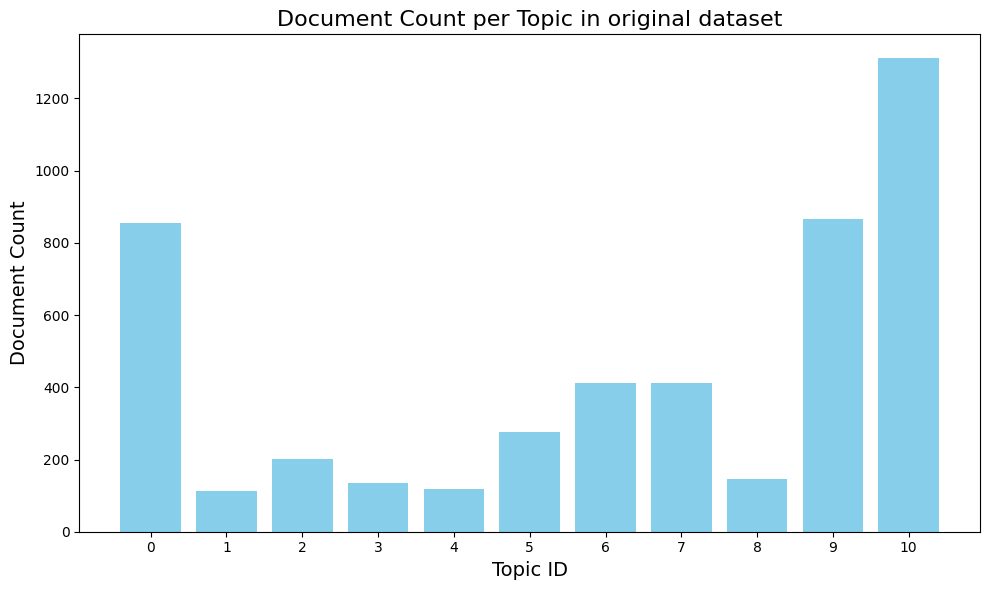

In [ ]:
topic_assignments = []

# Iterate through each document in the corpus
for doc_bow in corpus:
    # Get the topic distribution for the document
    topic_distribution = lda_model.get_document_topics(doc_bow)

    # Get the dominant topic (the topic with the highest probability)
    dominant_topic = max(topic_distribution, key=lambda x:x[1])

    # Append the topic_id to the list
    topic_assignments.append(dominant_topic[0])  # Store only the topic_id

# Create a DataFrame to analyze topic coverage
topic_df = pd.DataFrame(topic_assignments, columns=['Dominant Topic'])

# Count the number of documents for each topic
topic_counts = topic_df['Dominant Topic'].value_counts().reset_index()
topic_counts.columns = ['Topic ID', 'Document Count']

def get_top_words(topic_id, num_words=5):
    # Get the top words for the given topic_id
    top_words = lda_model.get_topic_terms(topic_id, topn=num_words)
    # Extract the words and format them into a string
    words = [dictionary[word_id] for word_id, prob in top_words]
    return ", ".join(words)

# # Apply the function to get top words for each topic
# topic_counts['Top Words'] = topic_counts['Topic ID'].apply(lambda x: get_top_words(x))

# # Print the distribution of topics with top words
# print(topic_counts)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.bar(topic_counts['Topic ID'], topic_counts['Document Count'], color='skyblue')

# Adding titles and labels
plt.title('Document Count per Topic in original dataset', fontsize=16)
plt.xlabel('Topic ID', fontsize=14)
plt.ylabel('Document Count', fontsize=14)
plt.xticks(topic_counts['Topic ID'])  # Set x-ticks to be the topic IDs

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Evaluate LDA model
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score: {coherence_lda}")

Coherence score: 0.5059280713493277


In [ ]:
back_translate = pd.read_csv('augmented_data_900.csv')
back_translate = back_translate.iloc[:,1]
back_translate = back_translate.sample(n=599)
print(back_translate.size)

gpt = pd.read_csv('gpt_augment.csv')
gpt = gpt.iloc[:,1]
print(gpt.size)

599
599


In [ ]:
# Step 1: Process the new data
processed_bt = [preprocess_text(text) for text in back_translate]
processed_gpt = [preprocess_text(text) for text in gpt]

# Step 2: Convert processed data to Bag-of-Words format
new_corpus_bt = [dictionary.doc2bow(text) for text in processed_bt]
new_corpus_gpt = [dictionary.doc2bow(text) for text in processed_gpt]

# Step 3: Get topic assignments for the new corpus
new_topic_assignments_bt = []
new_topic_assignments_gpt = []

for doc_bow in new_corpus_bt:
    # Get the topic distribution for the document
    topic_distribution = lda_model.get_document_topics(doc_bow)

    # Get the dominant topic (the topic with the highest probability)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])

    # Append the topic_id to the list
    new_topic_assignments_bt.append(dominant_topic[0])

for doc_bow in new_corpus_gpt:
    topic_distribution = lda_model.get_document_topics(doc_bow)

    dominant_topic = max(topic_distribution, key=lambda x: x[1])

    new_topic_assignments_gpt.append(dominant_topic[0])

# Create a DataFrame to analyze topic coverage
new_topic_df_bt = pd.DataFrame(new_topic_assignments_bt, columns=['Dominant Topic'])
new_topic_df_gpt = pd.DataFrame(new_topic_assignments_gpt, columns=['Dominant Topic'])

# Step 4: Count the number of documents for each topic
new_topic_counts_bt = new_topic_df_bt['Dominant Topic'].value_counts().reset_index()
new_topic_counts_bt.columns = ['Topic ID', 'Document Count']
new_topic_counts_gpt = new_topic_df_gpt['Dominant Topic'].value_counts().reset_index()
new_topic_counts_gpt.columns = ['Topic ID', 'Document Count']

new_topic_counts_bt = new_topic_counts_bt.sort_values(by='Topic ID').reset_index(drop=True)
new_topic_counts_gpt = new_topic_counts_gpt.sort_values(by='Topic ID').reset_index(drop=True)

print(new_topic_counts_bt)
print(new_topic_counts_gpt)

# Step 5: Add a column for top words associated with each topic
def get_top_words(topic_id, num_words=10):
    # Get the top words for the given topic_id
    top_words = lda_model.get_topic_terms(topic_id, topn=num_words)
    # Extract the words and format them into a string
    words = [dictionary[word_id] for word_id, prob in top_words]
    return ", ".join(words)

# # Apply the function to get top words for each topic
# new_topic_counts['Top Words'] = new_topic_counts['Topic ID'].apply(lambda x: get_top_words(x))

# # Print the distribution of topics with top words
# print(new_topic_counts)

    Topic ID  Document Count
0          0              83
1          1              18
2          2              18
3          3              16
4          4              13
5          5              29
6          6              48
7          7              48
8          8              11
9          9             162
10        10             153
    Topic ID  Document Count
0          0              70
1          1              12
2          2              19
3          3              16
4          4              12
5          5              21
6          6              42
7          7              47
8          8              13
9          9             175
10        10             172


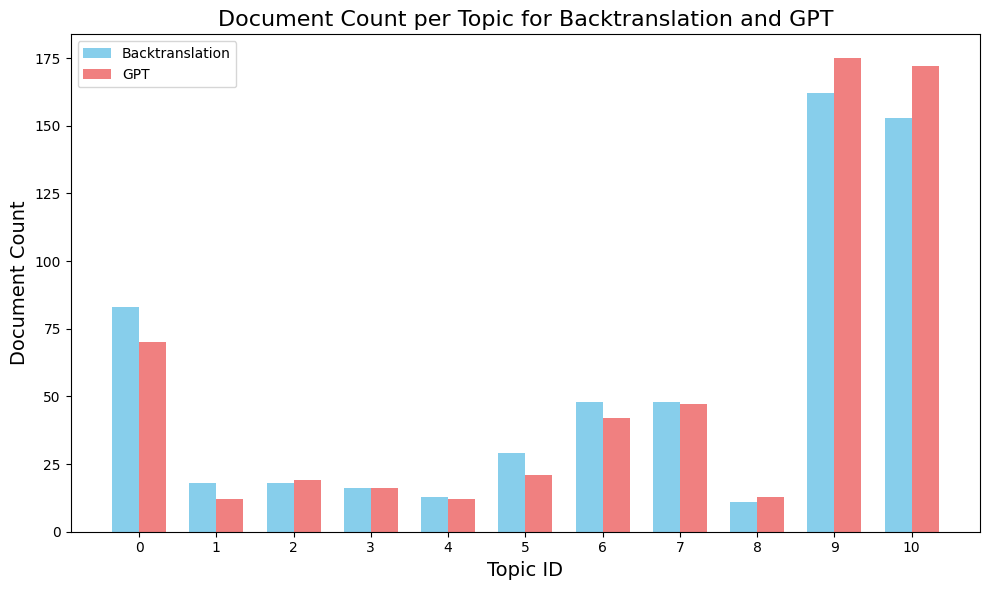

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Set the position of the bars on the x-axis
bar_width = 0.35  # Width of the bars
indices = np.arange(len(new_topic_counts_bt['Topic ID']))  # Topic indices

# Create the bars for backtranslation and GPT
bars1 = ax.bar(indices, new_topic_counts_bt['Document Count'], width=bar_width, label='Backtranslation', color='skyblue')
bars2 = ax.bar(indices + bar_width, new_topic_counts_gpt['Document Count'], width=bar_width, label='GPT', color='lightcoral')

# Adding titles and labels
ax.set_title('Document Count per Topic for Backtranslation and GPT', fontsize=16)
ax.set_xlabel('Topic ID', fontsize=14)
ax.set_ylabel('Document Count', fontsize=14)
ax.set_xticks(indices + bar_width / 2)  # Center the x-ticks between the two sets of bars
ax.set_xticklabels(new_topic_counts_bt['Topic ID'])  # Set x-tick labels to be the topic IDs
ax.legend()  # Show legend

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Category assignment based on the weight and return the topic index for each train corpus
def topic_assignment(all_corpus, lda_model):
    topic_assignments = [max(lda_model.get_document_topics(doc_bow), key=lambda x: x[1])[0] for doc_bow in all_corpus]
    return topic_assignments


In [ ]:
from gensim.models import LdaModel
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
import torch

tokenizer = BertTokenizer.from_pretrained("yiyanghkust/finbert-tone")

def tokenize_function(example):
    encoding = finbert_tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)
    encoding["labels"] = example["label"]
    return encoding


# Step 3: Create training and testing datasets grouped by topic
def create_topic_specific_datasets(corpus, labels, texts, topic_assignments):
    topic_datasets = {}
    for topic_id in set(topic_assignments):
        # Filter data for this specific topic
        topic_indices = [i for i, t in enumerate(topic_assignments) if t == topic_id]
        topic_texts = [texts[i] for i in topic_indices]
        topic_labels = [labels[i] for i in topic_indices]
        topic_bow = [corpus[i] for i in topic_indices]
        topic_datasets[topic_id] = Dataset.from_dict({'label': topic_labels, 'text': topic_texts})
        topic_datasets[topic_id] = topic_datasets[topic_id].map(tokenize_function, batched=True)
    return topic_datasets


# Step 4: Training function for each topic-specific FinBERT
def train_finbert_for_topic(topic_id, train_dataset):
    model = BertForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

    training_args = TrainingArguments(
        output_dir=f'./finbert_{topic_id}_output',
        num_train_epochs=3,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
    )

    trainer.train()
    return model

# Step 5: Train and store models for each topic
# The two approaches of augmentation we wil use
processed_bt = [preprocess_text(text) for text in back_translate]
processed_gpt = [preprocess_text(text) for text in gpt]
new_corpus_bt = [dictionary.doc2bow(text) for text in processed_bt]
new_corpus_gpt = [dictionary.doc2bow(text) for text in processed_gpt]

topic_models = {}
labels = list(df.iloc[:, 0])  # Labels for sentiment (e.g., 0, 1, 2)
label_mapping = {'neutral': 0, 'positive': 1, 'negative': 2}
labels = labels.map(label_mapping)
texts = list(headlines)
# I need to tokenize these texts
topic_assignments = topic_assignment(corpus)
topic_datasets = create_topic_specific_datasets(corpus, labels, texts, topic_assignments)

for topic_id, dataset in topic_datasets.items():
    topic_models[topic_id] = train_finbert_for_topic(topic_id, dataset)

# Step 6: Testing function to assign each test sample to the appropriate FinBERT
def predict_with_topic_specific_finbert(test_corpus, test_texts):
    predictions = []
    test_topic_assignments = topic_assignment(test_corpus)

    for i, text in enumerate(test_texts):
        topic_id = test_topic_assignments[i]
        model = topic_models.get(topic_id)

        # Tokenize and prepare for prediction
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()
        predictions.append(pred)

    return predictions

# Usage:
# Assuming test_corpus is the bag-of-words corpus for the test data and test_texts is the raw text data
test_corpus = [...]  # Bag-of-words corpus for test data
test_texts = [...]  # Raw text data for testing
test_predictions = predict_with_topic_specific_finbert(test_corpus, test_texts)

# Step 7: Compare to baseline model (if available)

In [ ]:
# topic enhanced Finbert
class TopicEnhancedFinBERT(torch.nn.Module):
    def __init__(self, base_model_name, topic_embedding_dim):
        super(TopicEnhancedFinBERT, self).__init__()
        self.finbert = BertForSequenceClassification.from_pretrained(base_model_name, num_labels = 3)
        self.topic_embedding = torch.nn.Embedding(num_topics = 11, topic_embedding_dim)
        self.fc = torch.nn.Linear(self.finbert.config.hidden_size + topic_embedding_dim, self.finbert.config.num_labels)

    def forward(self, input_ids, attention_mask, topic_ids):
        # Get FinBERT embeddings
        outputs = self.finbert.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # CLS token representation

        # Get topic embeddings
        topic_embeds = self.topic_embedding(topic_ids)

        # Concatenate topic embeddings and CLS embeddings
        combined = torch.cat((cls_output, topic_embeds), dim=1)

        # Classify
        logits = self.fc(combined)
        return logits

# Example usage
model = TopicEnhancedFinBERT(base_model_name="yiyanghkust/finbert-tone", topic_embedding_dim=10)


In [ ]:
def train_topic_enhanced_finbert(topic_id, train_dataset):
    model = TopicEnhancedFinBERT("yiyanghkust/finbert-tone", num_topics=len(set(topic_assignments)), topic_embedding_dim=10)

    training_args = TrainingArguments(
        output_dir=f'./finbert_topic_{topic_id}',
        num_train_epochs=3,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
    )

    trainer.train()
    return model

In [ ]:
# Step 3: Training topic-specific models
corpus = [...]  # Bag-of-words corpus for training data
labels = [...]  # Sentiment labels (0 for negative, 1 for neutral, 2 for positive)
texts = [...]  # Text data for training
topic_assignments = topic_assignment(corpus)
topic_datasets = create_topic_specific_datasets(corpus, labels, texts, topic_assignments)

topic_models = {}
for topic_id, dataset in topic_datasets.items():
    topic_models[topic_id] = train_topic_enhanced_finbert(topic_id, dataset)

# Step 4: Testing with topic-specific models
def predict_with_topic_enhanced_finbert(test_corpus, test_texts):
    predictions = []
    test_topic_assignments = topic_assignment(test_corpus)

    for i, text in enumerate(test_texts):
        topic_id = test_topic_assignments[i]
        model = topic_models.get(topic_id)

        # Tokenize and prepare for prediction
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
        inputs['topic_ids'] = torch.tensor([topic_id])

        # Make prediction
        outputs = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'], topic_ids=inputs['topic_ids'])
        pred = torch.argmax(outputs, dim=1).item()
        predictions.append(pred)

    return predictions

# Usage:
# Assuming test_corpus is the bag-of-words corpus for the test data and test_texts is the raw text data
test_corpus = [...]  # Bag-of-words corpus for test data
test_texts = [...]   # Raw text data for testing
test_predictions = predict_with_topic_enhanced_finbert(test_corpus, test_texts)

# Output the predictions
print(test_predictions)